In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
###LOAD
data = pd.read_csv('IPL Matches 2008-2020.csv')

In [8]:
data.head(-5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,1216542,Dubai,2020-10-08,JM Bairstow,Dubai International Cricket Stadium,0,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,69.0,N,NaN,AK Chaudhary,Nitin Menon
807,1216543,Dubai,2020-10-14,A Nortje,Dubai International Cricket Stadium,0,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,Delhi Capitals,runs,13.0,N,NaN,AK Chaudhary,Nitin Menon
808,1216544,Dubai,2020-10-25,RD Gaikwad,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,Chennai Super Kings,wickets,8.0,N,NaN,C Shamshuddin,RK Illingworth
809,1216545,Abu Dhabi,2020-09-26,Shubman Gill,Sheikh Zayed Stadium,0,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,7.0,N,NaN,CB Gaffaney,VK Sharma


data.info()

In [12]:
data.drop(['method'],  axis = 1 , inplace= True)

In [14]:
####MOST WINS IN IPL
temp= pd.DataFrame({"Winner": data['winner']})
count_wins= temp.value_counts()
print(count_wins)

Winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


In [16]:
## NAMS OF THE TEAMS WHICH WIN THE MATCH
temp= pd.DataFrame({"Winner": data['winner']})
count_wins= temp.value_counts()
lables = [X[0] for X in count_wins.keys()]
lables


['Mumbai Indians',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Rajasthan Royals',
 'Delhi Daredevils',
 'Sunrisers Hyderabad',
 'Deccan Chargers',
 'Delhi Capitals',
 'Gujarat Lions',
 'Pune Warriors',
 'Rising Pune Supergiant',
 'Kochi Tuskers Kerala',
 'Rising Pune Supergiants']

Text(0.5, 1.0, 'MOST WINS IN IPL')

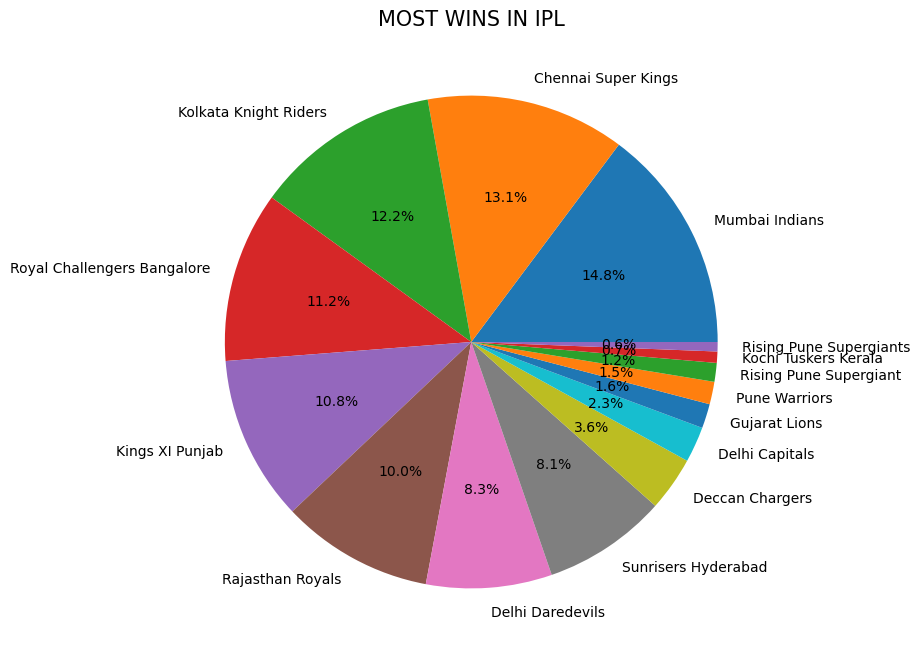

In [22]:
###FOR SHOWING WINNING TEAMS THROUGH PIE CHART
temp= pd.DataFrame({"Winner": data['winner']})
count_wins= temp.value_counts()
labels = [X[0] for X in count_wins.keys()]

bar , ax = plt.subplots(figsize = (15,8))
ax = plt.pie( x = count_wins , autopct = "%.1f%%" ,   labels = labels )
plt.title("MOST WINS IN IPL", fontsize= 15 )


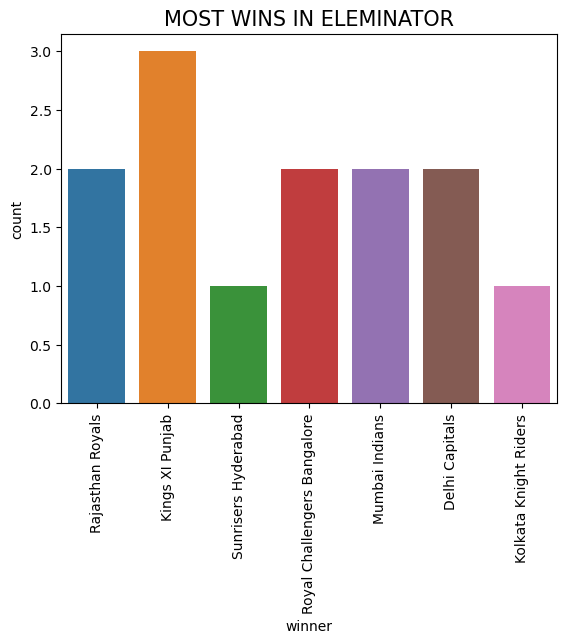

In [73]:
sns.countplot(x='winner', data=data[data['eliminator'] == 'Y'])

plt.title("MOST WINS IN ELEMINATOR" , fontsize= 15)
plt.xticks(rotation = 90)
plt.show()

In [35]:
#TOSS DECISION
teams = data['toss_winner'].unique()
teams

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [76]:
teams = data['toss_winner'].unique()

decision_making = pd.DataFrame([], columns = ['Toss Winner', 'Decision', 'Times'])

for id, element in enumerate(teams):
    temp_bat = data[(data['toss_winner'] == element) & (data['toss_decision'] == 'bat')]
    temp_fiels = data[(data['toss_winner'] == element) & (data['toss_decision'] == 'field')]



    decision_making = decision_making.append({'Toss Winner': element,
                                             'Decision': 'bat' , 'Times':temp_bat['toss_winner'].count()}, ignore_index= True)

    decision_making = decision_making.append({'Toss Winner': element,
                                             'Decision': 'fiels' , 'Times':temp_bat['toss_winner'].count()}, ignore_index= True)




AttributeError: 'DataFrame' object has no attribute 'append'

In [75]:
decision_making

,Toss Winner,Decision,Times


In [74]:
sns.catplot(x="Toss Winner" , y='Times', hue ="Decision", data= decision_making , kind ='bar', height=5, aspect=2 )

plt.xticks(rotation=90)
plt.title("Toss DECISION OF TEAMS")
plt.xlabel("IPL teams ")
plt.ylabel("Toss DECISION")

ValueError: min() arg is an empty sequence

Text(0, 0.5, 'Venue')

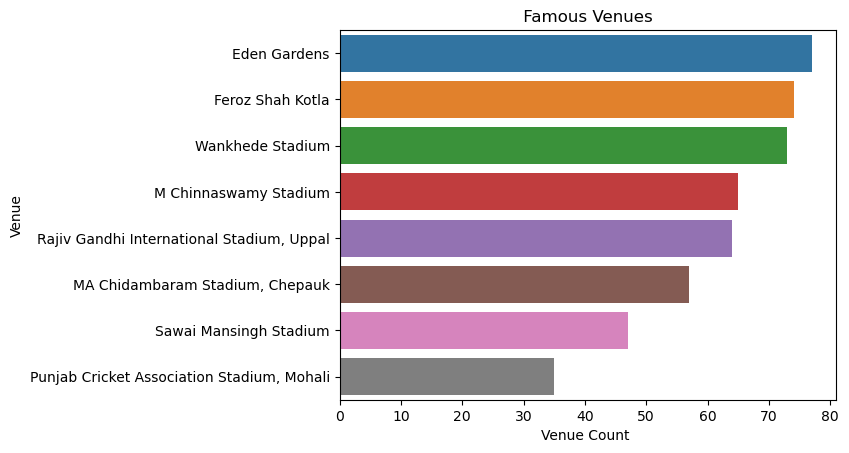

In [52]:
sns.barplot(x= data['venue'].value_counts().head(8).values,
           y= data['venue'].value_counts().head(8).index,
           data=data
           )
plt.title(" Famous Venues ")
plt.xlabel("Venue Count ")
plt.ylabel("Venue")

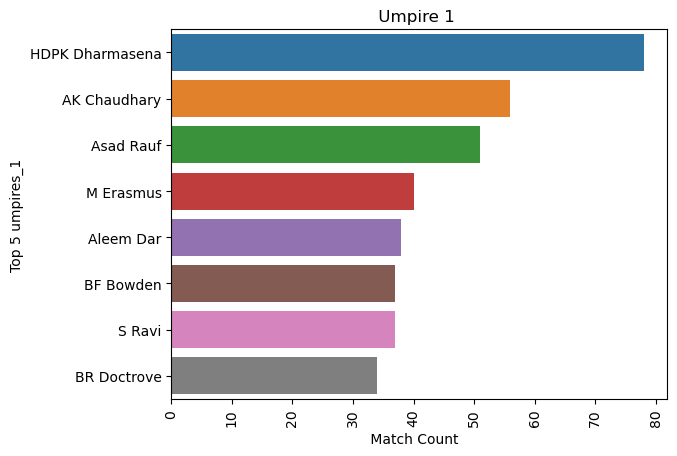

In [68]:
###TOP 5 UMPIRE_1
sns.barplot(x= data['umpire1'].value_counts().head(8).values,
           y= data['umpire1'].value_counts().head(8).index,
           data=data
           )
plt.xticks(rotation=90)
plt.title(" Umpire 1  ")
plt.xlabel(" Match Count   ")
plt.ylabel("Top 5 umpires_1")
plt.show()

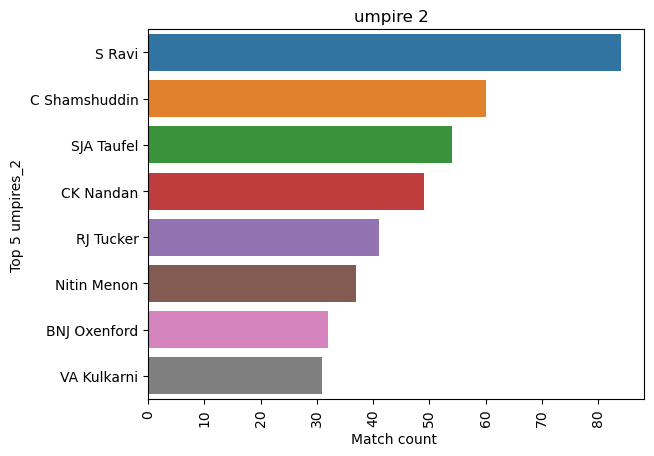

In [69]:
sns.barplot(x= data['umpire2'].value_counts().head(8).values,
           y= data['umpire2'].value_counts().head(8).index,
           data=data
           )
plt.xticks(rotation=90)
plt.title("umpire 2  ")
plt.xlabel("Match count ")
plt.ylabel("Top 5 umpires_2")
plt.show()